# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [159]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [160]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [161]:
#Create empty lists for dataframe
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [162]:
url='http://api.openweathermap.org/data/2.5/weather?'
ticker=1
print('Beginning Data Retrieval')

for x in cities:
    print(f"Processing Record {ticker} | {x}")
    query= url + "appid=" + weather_api_key + "&q=" + x
    response=requests.get(query).json()
    try:    
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country']) 
        date.append(response['dt'])
        ticker+=1
    except:
        print("City not found!")
        lat.append(None)
        lng.append(None)
        max_temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        windspeed.append(None)
        country.append(None) 
        date.append(None)
        ticker+=1
        pass

Beginning Data Retrieval
Processing Record 1 | port alfred
Processing Record 2 | kruisfontein
Processing Record 3 | new norfolk
Processing Record 4 | rikitea
Processing Record 5 | waipawa
Processing Record 6 | dubti
Processing Record 7 | albany
Processing Record 8 | tiksi
Processing Record 9 | cape town
Processing Record 10 | vaini
Processing Record 11 | belushya guba
City not found!
Processing Record 12 | namibe
Processing Record 13 | padang
Processing Record 14 | yellowknife
Processing Record 15 | hirara
Processing Record 16 | bengkulu
Processing Record 17 | halalo
City not found!
Processing Record 18 | dikson
Processing Record 19 | bethel
Processing Record 20 | barrow
Processing Record 21 | ushuaia
Processing Record 22 | chokurdakh
Processing Record 23 | sayat
Processing Record 24 | nizhneyansk
City not found!
Processing Record 25 | valparaiso
Processing Record 26 | jaciara
Processing Record 27 | college
Processing Record 28 | komsomolskiy
Processing Record 29 | cabedelo
Processing 

Processing Record 240 | bathsheba
Processing Record 241 | moranbah
Processing Record 242 | asyut
Processing Record 243 | san patricio
Processing Record 244 | aldama
Processing Record 245 | castro
Processing Record 246 | tigwi
City not found!
Processing Record 247 | kazalinsk
City not found!
Processing Record 248 | glendive
Processing Record 249 | arlit
Processing Record 250 | alice springs
Processing Record 251 | marawi
Processing Record 252 | ixtapa
Processing Record 253 | belaya gora
Processing Record 254 | westport
Processing Record 255 | vicuna
Processing Record 256 | hamilton
Processing Record 257 | tura
Processing Record 258 | vardo
Processing Record 259 | bambanglipuro
Processing Record 260 | albury
Processing Record 261 | burgeo
Processing Record 262 | hildesheim
Processing Record 263 | faanui
Processing Record 264 | deputatskiy
Processing Record 265 | calbuco
Processing Record 266 | naftah
City not found!
Processing Record 267 | yumen
Processing Record 268 | kuandian
Processin

City not found!
Processing Record 477 | arroyo
Processing Record 478 | sukumo
Processing Record 479 | turukhansk
Processing Record 480 | shalazhi
Processing Record 481 | san quintin
Processing Record 482 | kang
Processing Record 483 | eura
Processing Record 484 | nhulunbuy
Processing Record 485 | pueblo
Processing Record 486 | mouzakion
City not found!
Processing Record 487 | quatre cocos
Processing Record 488 | port lincoln
Processing Record 489 | tateyama
Processing Record 490 | ceres
Processing Record 491 | finschhafen
Processing Record 492 | merauke
Processing Record 493 | hetauda
Processing Record 494 | mehamn
Processing Record 495 | ponta do sol
Processing Record 496 | kuna
Processing Record 497 | panapakkam
City not found!
Processing Record 498 | osijek
Processing Record 499 | bokspits
City not found!
Processing Record 500 | constantine
Processing Record 501 | chancay
Processing Record 502 | kiunga
Processing Record 503 | tumannyy
City not found!
Processing Record 504 | mulege
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [175]:
cities_df=pd.DataFrame({
                        'Cities':cities,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':max_temp,
                        'Humidity':humidity,
                        'Cloudiness':cloudiness,
                        'Windspeed':windspeed,
                        'Country':country,
                        'Date':date
                        })
cities_df=cities_df.dropna()
cities_df.to_csv('../Output_Data/cities_df.csv')

,Cities,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#cities_df.loc[cities_df['Humidity']>100]
print('0 cities found with humidity > 100')

In [15]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

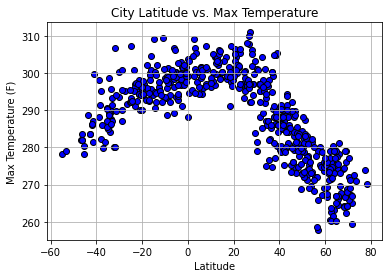

In [187]:
x=cities_df['Lat']
y=cities_df['Max Temp']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

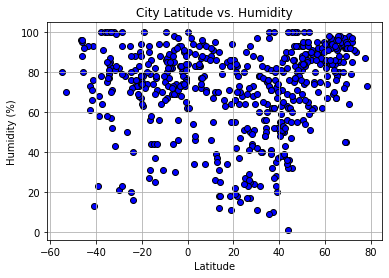

In [188]:
x=cities_df['Lat']
y=cities_df['Humidity']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

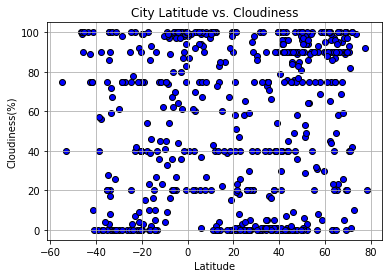

In [189]:
x=cities_df['Lat']
y=cities_df['Cloudiness']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

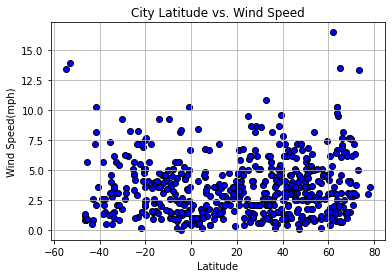

In [190]:
x=cities_df['Lat']
y=cities_df['Windspeed']
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()
plt.show()

## Linear Regression

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8675230083190334


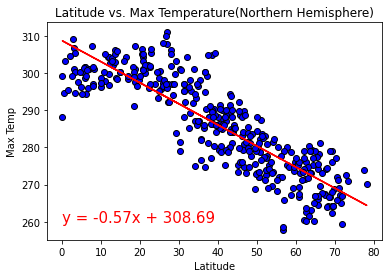

In [207]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature(Northern Hemisphere)')
plt.annotate(equation,(0,260),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7144529753597846


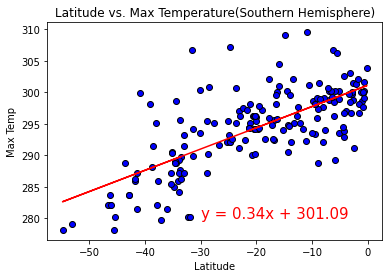

In [209]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temperature(Southern Hemisphere)')
plt.annotate(equation,(-30,280),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3413480389649083


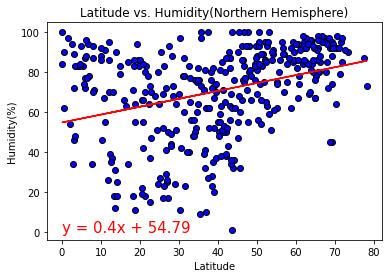

In [211]:
north_hem=cities_df.loc[cities_df['Lat']>0]
x=north_hem['Lat']
y=north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Latitude vs. Humidity(Northern Hemisphere)')
plt.annotate(equation,(0,0),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.025264930132729794


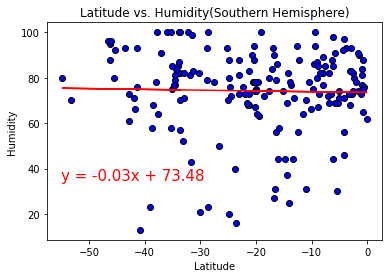

In [213]:
south_hem=cities_df.loc[cities_df['Lat']<0]
x=south_hem['Lat']
y=south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_vals = x * slope + intercept
equation="y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")
plt.scatter(x,y,color='blue',edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity(Southern Hemisphere)')
plt.annotate(equation,(-55,35),fontsize=15,color="red")
plt.plot(x,regress_vals,'red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression